In [1]:
from netwin import *
import os
import matplotlib.pyplot as plt

In [2]:
root_dir = '/home/chaggar/Documents/Network_Inference'
graph_path = os.path.join(root_dir, 'data/brain_networks/scale1.csv')


In [3]:
class NetworkDiffusion(Model):

    def f(self, p, t, theta):
        k = theta
        du = k * (-self.L() @ p)
        return du

    def solve(self, p, theta):
        return odeint(self.f, p, self.t, args=(theta,))

    def forward(self, u0): 
        p = np.exp(u0[:-1])
        theta = u0[-1]
        #
        # print(u0)
        u = self.solve(p,theta) 
        return u

In [4]:
m = NetworkDiffusion(network_path=graph_path)

In [5]:
p = np.zeros([83])
p[40] = 10
k = 5

u0 = np.append(np.log(p), k)

m.t = np.linspace(0,1.0,100)

p0 = np.ones([83])
k0 = 1

u_0 = np.append(p0, k0)

In [6]:
sim = m.f(p = p, t = m.t, theta = k)

In [7]:
data = m.forward(u0=u0)

In [8]:
problem = InferenceProblem(inference='VB', model=m, data = data, init_means=u_0)

In [9]:
sol = problem.infer(n=20)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Finished!


In [10]:
sol[0]

array([-1.26741933e-03,  1.66412689e-03,  2.88534854e-03,  1.08452480e-03,
       -1.04732911e-03, -9.35404004e-04, -7.31991369e-04, -7.23103508e-04,
       -7.76330818e-04, -6.32470683e-04, -9.52448337e-04,  9.84707807e-04,
       -4.65051147e-04, -4.46880471e-04, -2.57612929e-04, -8.11723533e-04,
       -7.35887995e-04, -5.57633951e-04, -9.74248628e-04, -9.15817284e-04,
        7.03799163e-04, -1.59081405e-03, -1.26938526e-03, -1.15270158e-03,
       -1.98728741e-03, -1.79816210e-03, -2.74116928e-03, -2.78992162e-03,
       -1.89419478e-03, -1.98557739e-03, -1.66421696e-03, -1.71966649e-03,
       -1.94920644e-03, -5.30265084e-04, -1.87122033e-04, -1.90435716e-04,
       -5.26017286e-04, -1.04132064e-03, -7.55029624e-04, -4.68013663e-04,
        2.29965498e+00,  1.95553436e-03,  3.26686509e-03,  3.45798730e-03,
        2.23088045e-03,  1.83875966e-03,  1.36280798e-03,  1.21354611e-03,
        1.22305089e-03,  1.15873001e-03,  1.14274023e-03,  1.39390505e-03,
        1.33546810e-03,  

In [23]:
fkpp = NetworkFKPP(network_path=graph_path)

In [46]:
p = np.zeros([83])
mask = [25, 26, 39, 40, 66, 67, 80, 81]
p[mask] = 0.01
k = 5
a = 1

u0 = np.append(np.log(p), [k, a])

fkpp.t = np.linspace(0,1,100)

p0 = np.ones([83])
k0 = 2
a0 = 3
u_0 = np.append(p0, [k0, a0])

In [47]:
sim = fkpp.f(p = p, t = fkpp.t, theta = [k, a])

In [48]:
data = fkpp.forward(u0=u0)

In [49]:
problem = InferenceProblem(inference='VB', model=fkpp, data = data,init_means=u_0)

In [50]:
sol = problem.infer()

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Finished!


In [51]:
sol[0]

array([-1.45134419, -1.45141186, -1.45155907, -1.45136974, -1.45135843,
       -1.45132612, -1.45134117, -1.45131848, -1.45132316, -1.45131868,
       -1.45132014, -1.45137331, -1.45131849, -1.45131062, -1.4513206 ,
       -1.45132199, -1.45130441, -1.45127091, -1.45126953, -1.45129012,
       -1.45130955, -1.45129405, -1.45125653, -1.45129732, -1.45124783,
       -1.44951785, -1.4484159 , -1.45109227, -1.45126224, -1.45126174,
       -1.45125962, -1.45124965, -1.45126671, -1.45128633, -1.45011372,
       -1.45033059, -1.45132309, -1.45128181, -1.45130539, -1.44989328,
       -1.44956304, -1.45135975, -1.45141678, -1.45150443, -1.45137048,
       -1.45136471, -1.45130642, -1.45132791, -1.45129985, -1.45132436,
       -1.45131766, -1.45131178, -1.45136371, -1.45131334, -1.45130734,
       -1.45048166, -1.45132449, -1.45129456, -1.45130432, -1.45134016,
       -1.45132615, -1.4513041 , -1.4513007 , -1.45126285, -1.45126731,
       -1.45122954, -1.44950009, -1.44866174, -1.4511659 , -1.45

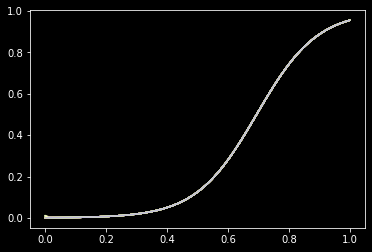

In [39]:
ax = plt.figure()

plt.plot(fkpp.t,data)
plt.show()

In [16]:
plot_nodes(data[10], opacity=0.7, colour='YlOrRd')